In [3]:
import pandas as pd

In [5]:
import numpy as np

In [123]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [125]:
import seaborn as sns

In [7]:
df_Air=pd.read_csv("listings.csv")

In [12]:
df_Air.drop(['name','host_id', 'host_name', 'neighbourhood_group',
             'license'] ,axis=1, inplace=True)

In [15]:
#Convertion of Object to datatime64
df_Air['last_review']= pd.to_datetime(df_Air['last_review'], errors='coerce')

In [18]:
df_Air.loc[:, 'neighbourhood'] = df_Air['neighbourhood'].str.replace('/YBI', '', regex=False)

In [21]:
df_police=pd.read_csv("Police_Reports__2018_to_Present.csv")

In [23]:
df_police.drop(['Incident Datetime','Incident Day of Week','Report Datetime','Row ID',
                'Incident ID','CAD Number','Report Type Code','Report Type Description', 'Filed Online', 
                'Incident Code','Incident Subcategory',	'Incident Description',	'Resolution',
                'CNN','Supervisor District','Supervisor District 2012','Point','Neighborhoods',
                'ESNCAG - Boundary File','Central Market/Tenderloin Boundary Polygon - Updated',
                'Civic Center Harm Reduction Project Boundary','HSOC Zones as of 2018-06-05',
                'Invest In Neighborhoods (IIN) Areas','Current Supervisor Districts','Current Police Districts'], axis=1,
inplace=True)


In [25]:
# Changing " Analysis Neighborhood to neighbourhood and Latitude to latitude, Longitude to longitude. 

In [27]:
df_police.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude',
                         'Analysis Neighborhood':'neighbourhood'}, inplace=True)

In [33]:
#Deleting all the Na values in the neighbourhood column.
df_Police_Cleaned = df_police.dropna(subset=['neighbourhood'])

In [36]:
# Proceed to reset the index. 
df_Police_Cleaned.reset_index(drop=True,inplace=True)  

In [38]:
#Rewriting and cleaning neighbourhood column in Police Dataset to a complete match to AirBnB.

In [40]:
df_Police_Cleaned.loc[:, 'neighbourhood'] = df_Police_Cleaned['neighbourhood'].str.replace('Hunters Point', '', regex=False)

In [45]:
df_Police_Cleaned.loc[:, 'neighbourhood'] = df_Police_Cleaned['neighbourhood'].str.replace('/South Beach', '', regex=False)

In [47]:
#Filtering Police Dataset from 2023 to 2024 in order to have a smaller and more significant sample.

In [51]:
df_Police_2023= df_Police_Cleaned[(df_Police_Cleaned['Incident Date'] >= '2023-01-01') & 
(df_Police_Cleaned['Incident Date'] <= '2024-09-01')]

In [54]:
df_Police_2023.reset_index(drop=True,inplace=True)

In [57]:
#Checking the unique values of both Datasets.
df_Police_2023['neighbourhood'].unique()

array(['Golden Gate Park', 'Potrero Hill', 'Tenderloin', 'Noe Valley',
       'Nob Hill', 'Presidio Heights', 'Castro/Upper Market', 'Mission',
       'Financial District', 'Sunset/Parkside', 'Inner Richmond',
       'Western Addition', 'West of Twin Peaks', 'South of Market',
       'Marina', 'Bayview ', 'Bernal Heights', 'Pacific Heights',
       'Excelsior', 'Inner Sunset', 'North Beach', 'Hayes Valley',
       'Lone Mountain/USF', 'Portola', 'Lakeshore', 'Outer Mission',
       'Mission Bay', 'Glen Park', 'Outer Richmond', 'Chinatown',
       'Japantown', 'Twin Peaks', 'Oceanview/Merced/Ingleside',
       'Visitacion Valley', 'Haight Ashbury', 'Russian Hill',
       'Lincoln Park', 'McLaren Park', 'Presidio', 'Treasure Island',
       'Seacliff'], dtype=object)

In [60]:
df_Air['neighbourhood'].unique()

array(['Financial District', 'Downtown/Civic Center', 'Noe Valley',
       'Outer Sunset', 'South of Market', 'Parkside', 'Marina',
       'Pacific Heights', 'Outer Mission', 'West of Twin Peaks',
       'Excelsior', 'Castro/Upper Market', 'Western Addition',
       'Russian Hill', 'Haight Ashbury', 'Chinatown', 'Nob Hill',
       'North Beach', 'Outer Richmond', 'Twin Peaks', 'Inner Richmond',
       'Bayview', 'Ocean View', 'Mission', 'Potrero Hill',
       'Bernal Heights', 'Inner Sunset', 'Presidio Heights',
       'Crocker Amazon', 'Lakeshore', 'Visitacion Valley', 'Glen Park',
       'Presidio', 'Seacliff', 'Diamond Heights', 'Golden Gate Park',
       'Treasure Island'], dtype=object)

In [63]:
#Need to delete the space added to Bayview when modified in order to match, modify names.

In [66]:
df_Air.loc[:, 'neighbourhood'] = df_Air['neighbourhood'].str.strip()

In [69]:
df_Police_Cleaned.loc[:, 'neighbourhood'] = df_Police_2023['neighbourhood'].str.strip()

In [72]:
#Checking which neighborhoods are present in Police Dataset.
df_Air['col1_in_df2'] = df_Air['neighbourhood'].isin(df_Police_2023['neighbourhood'])

In [75]:
true_rows = df_Air[df_Air['col1_in_df2'] == True]

In [78]:
#This would be ideal but kernels keep dying so need to make it smaller.
#merged_df = pd.merge(df_Police_2023, df_Air, on='neighbourhood', how='inner')

In [81]:
df_Mission = df_Police_2023[df_Police_2023['neighbourhood'] == 'Mission']

In [84]:
df_merged = pd.merge(df_Mission, df_Air, on='neighbourhood', how='inner')

In [101]:
df_merged.head()

,Incident Date,Incident Time,Incident Year,Incident Number,Incident Category,Intersection,Police District,neighbourhood,latitude_x,longitude_x,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,col1_in_df2
0,2023/02/01,14:50,2023,230078055,Robbery,23RD ST \ VALENCIA ST,Mission,Mission,37.753703,-122.420812,...,Entire home/apt,110.0,30,7,2023-05-25,0.20,3,364,0,True
1,2023/02/01,14:50,2023,230078055,Robbery,23RD ST \ VALENCIA ST,Mission,Mission,37.753703,-122.420812,...,Entire home/apt,NaN,2,6,2023-10-05,0.05,1,0,3,True
2,2023/02/01,14:50,2023,230078055,Robbery,23RD ST \ VALENCIA ST,Mission,Mission,37.753703,-122.420812,...,Entire home/apt,245.0,3,49,2023-08-10,0.44,1,13,0,True
3,2023/02/01,14:50,2023,230078055,Robbery,23RD ST \ VALENCIA ST,Mission,Mission,37.753703,-122.420812,...,Entire home/apt,183.0,3,604,2024-09-01,5.10,2,132,57,True
4,2023/02/01,14:50,2023,230078055,Robbery,23RD ST \ VALENCIA ST,Mission,Mission,37.753703,-122.420812,...,Private room,NaN,1,59,2024-04-21,0.77,3,0,1,True


In [107]:
df_merged['Incident Date'] = pd.to_datetime(df_merged['Incident Date'], errors='coerce')

In [254]:
df_merged['Year-Month'] = df_merged['Incident Date'].dt.to_period('M')

In [257]:
df_merged_unique = df_merged.drop_duplicates(subset=['Incident Number', 'Year-Month'])

In [259]:
df_filtered = df_merged_unique[df_merged_unique['Year-Month'].dt.year.isin([2023, 2024])]

In [266]:
incident_count_by_month = df_filtered.groupby('Year-Month')['Incident Number'].nunique().reset_index()

In [297]:
review_count_by_month = df_filtered.groupby('Year-Month')['number_of_reviews'].sum().reset_index()


In [303]:
merged_data = pd.merge(incident_count_by_month, review_count_by_month, left_on='Year-Month', right_on='Year-Month', how='outer')

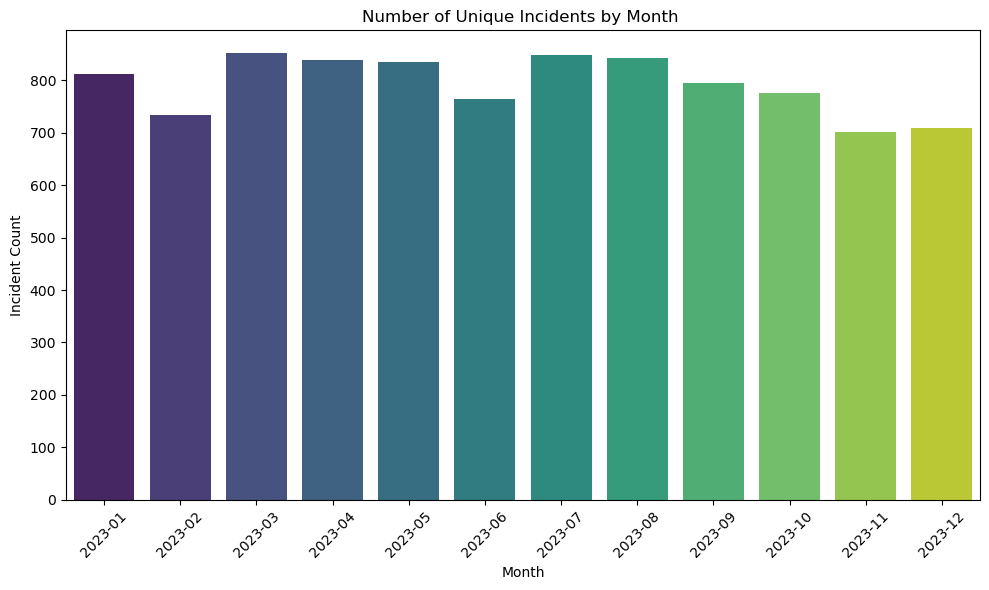

In [285]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year-Month', y='Incident Number', data=incident_count_by_month,  palette='viridis')
plt.title('Number of Unique Incidents by Month ')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [330]:
merged_data['Year-Month-Str'] = merged_data['Year-Month'].dt.to_timestamp()

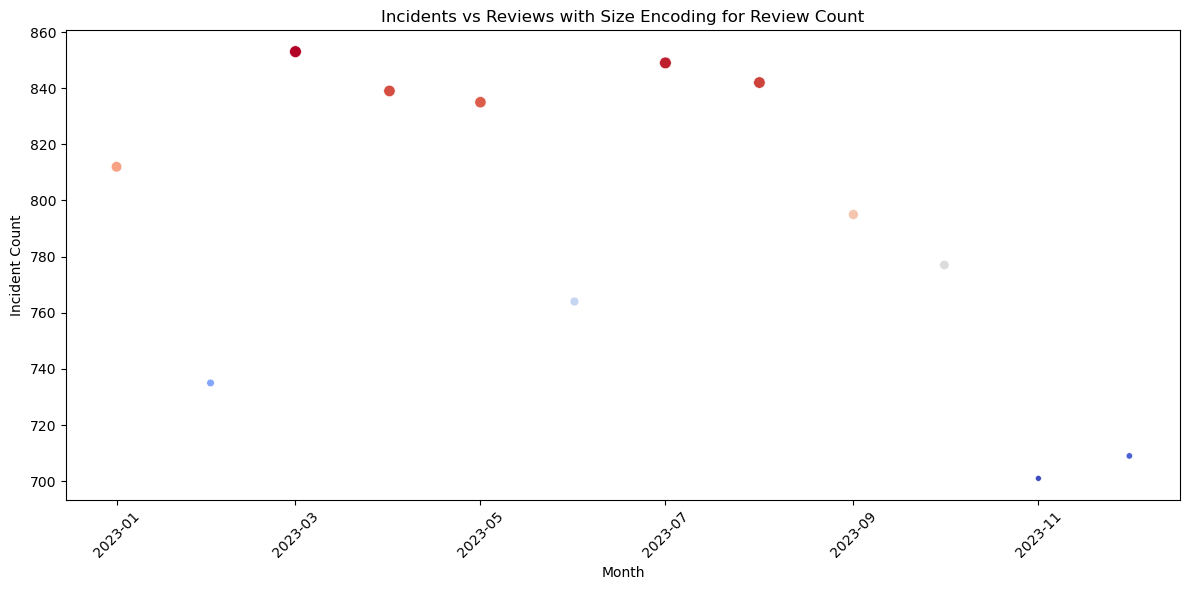

In [336]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year-Month-Str', y='Incident Number', size='number_of_reviews', data=merged_data, 
                hue='Incident Number', palette='coolwarm', legend=None)
plt.title('Incidents vs Reviews with Size Encoding for Review Count')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()